In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [60]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [61]:
df.replace(-200,pd.NA, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   object 
 3   PT08.S1(CO)    8991 non-null   object 
 4   NMHC(GT)       914 non-null    object 
 5   C6H6(GT)       8991 non-null   object 
 6   PT08.S2(NMHC)  8991 non-null   object 
 7   NOx(GT)        7718 non-null   object 
 8   PT08.S3(NOx)   8991 non-null   object 
 9   NO2(GT)        7715 non-null   object 
 10  PT08.S4(NO2)   8991 non-null   object 
 11  PT08.S5(O3)    8991 non-null   object 
 12  T              8991 non-null   object 
 13  RH             8991 non-null   object 
 14  AH             8991 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(2), object(15)
memory usage: 1.2+ MB


In [62]:
df.drop('Unnamed: 15', axis=1, inplace=True)
df.drop('Unnamed: 16', axis=1, inplace=True)
df.drop('NMHC(GT)', axis=1, inplace=True)
df.info()
print(df.isnull().sum())
print(df.isnull().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           9357 non-null   object
 1   Time           9357 non-null   object
 2   CO(GT)         7674 non-null   object
 3   PT08.S1(CO)    8991 non-null   object
 4   C6H6(GT)       8991 non-null   object
 5   PT08.S2(NMHC)  8991 non-null   object
 6   NOx(GT)        7718 non-null   object
 7   PT08.S3(NOx)   8991 non-null   object
 8   NO2(GT)        7715 non-null   object
 9   PT08.S4(NO2)   8991 non-null   object
 10  PT08.S5(O3)    8991 non-null   object
 11  T              8991 non-null   object
 12  RH             8991 non-null   object
 13  AH             8991 non-null   object
dtypes: object(14)
memory usage: 1.0+ MB
Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NO

In [63]:
df['Time'] = df['Time'].str.replace('.', ':', regex= False)
df['Time']

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9466         NaN
9467         NaN
9468         NaN
9469         NaN
9470         NaN
Name: Time, Length: 9471, dtype: object

In [64]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [65]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [66]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


In [67]:
for col in df.columns:
    if col!='Datetime':
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True) #
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         6941 non-null   float64       
 1   PT08.S1(CO)    6941 non-null   float64       
 2   C6H6(GT)       6941 non-null   float64       
 3   PT08.S2(NMHC)  6941 non-null   float64       
 4   NOx(GT)        6941 non-null   float64       
 5   PT08.S3(NOx)   6941 non-null   float64       
 6   NO2(GT)        6941 non-null   float64       
 7   PT08.S4(NO2)   6941 non-null   float64       
 8   PT08.S5(O3)    6941 non-null   float64       
 9   T              6941 non-null   float64       
 10  RH             6941 non-null   float64       
 11  AH             6941 non-null   float64       
 12  Datetime       6941 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12)
memory usage: 759.2 KB


            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  6941.000000  6941.000000  6941.000000    6941.000000  6941.000000   
mean      2.182467  1119.913269    10.554488     958.543005   250.671949   
min       0.100000   647.000000     0.200000     390.000000     2.000000   
25%       1.100000   956.000000     4.900000     760.000000   103.000000   
50%       1.900000  1085.000000     8.800000     931.000000   186.000000   
75%       2.900000  1254.000000    14.600000    1135.000000   335.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   
std       1.441158   218.733754     7.465226     264.055002   208.611371   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   6941.000000  6941.000000   6941.000000  6941.000000  6941.000000   
mean     816.893387   113.874082   1452.648898  1057.756519    17.755323   
min      322.000000     2.000000    551.000000   221.000000    -1.900000   
25%      64

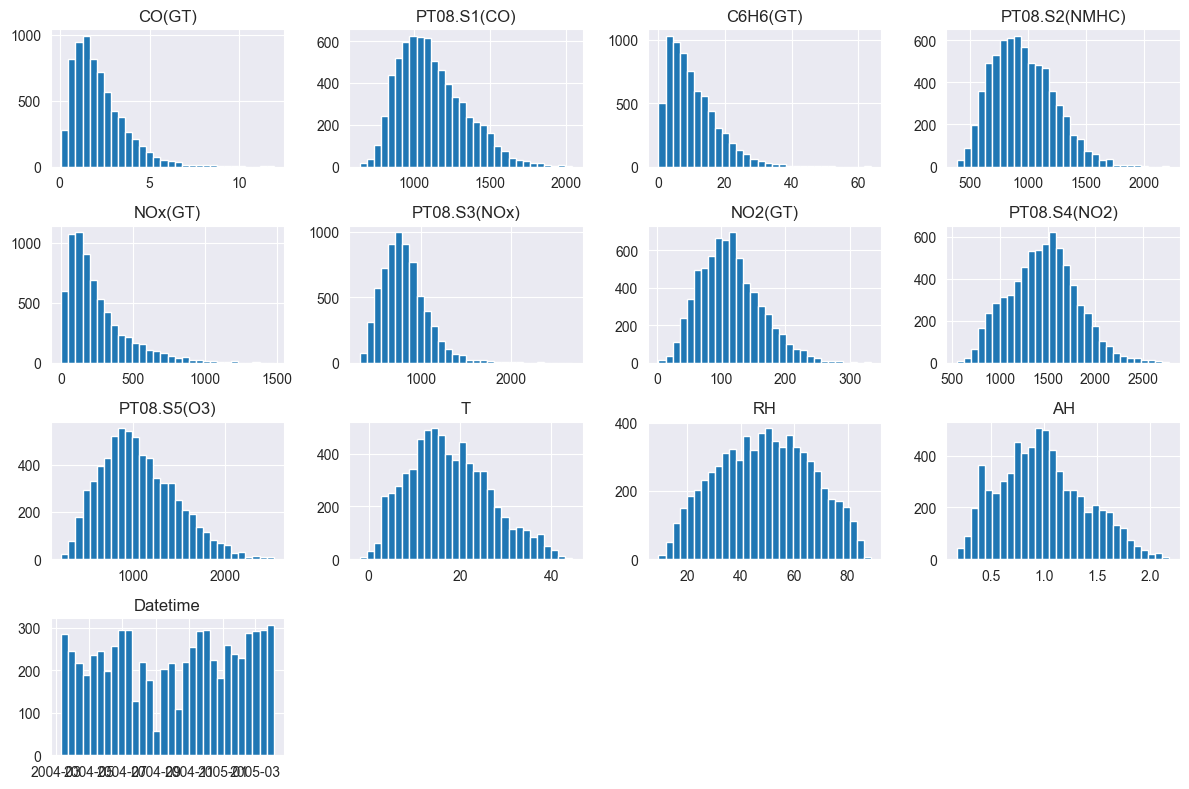

In [68]:
print(df.describe())
df.hist(figsize(12, 8), bins=30)
plt.tight_layout()
plt.show()

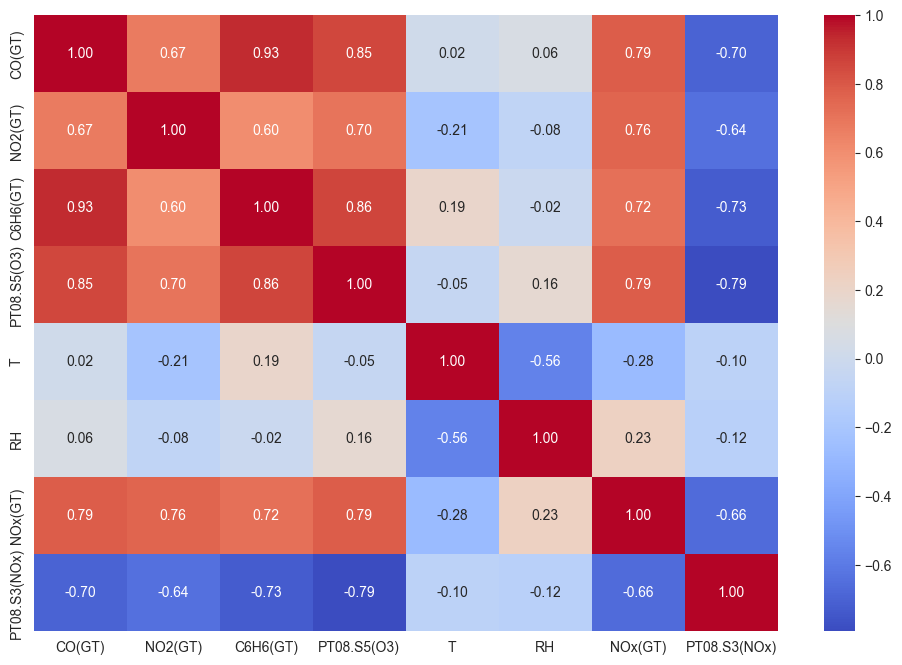

In [69]:
poluentes = ['CO(GT)', 'NO2(GT)', 'C6H6(GT)', 'PT08.S5(O3)', 'T', 'RH', 'NOx(GT)', 'PT08.S3(NOx)']
ambiente = ['T', 'RH', 'AH']
sensores = ['CO(GT)', 'NO2(GT)', 'NOx(GT)', 'PT08.S1(CO)', 'PT08.S4(NO2)', 'PT08.S3(NOx)']

corrmat = df[poluentes].corr()
sns.heatmap(corrmat, annot=True, cmap="coolwarm", fmt= ".2f" )
plt.show()

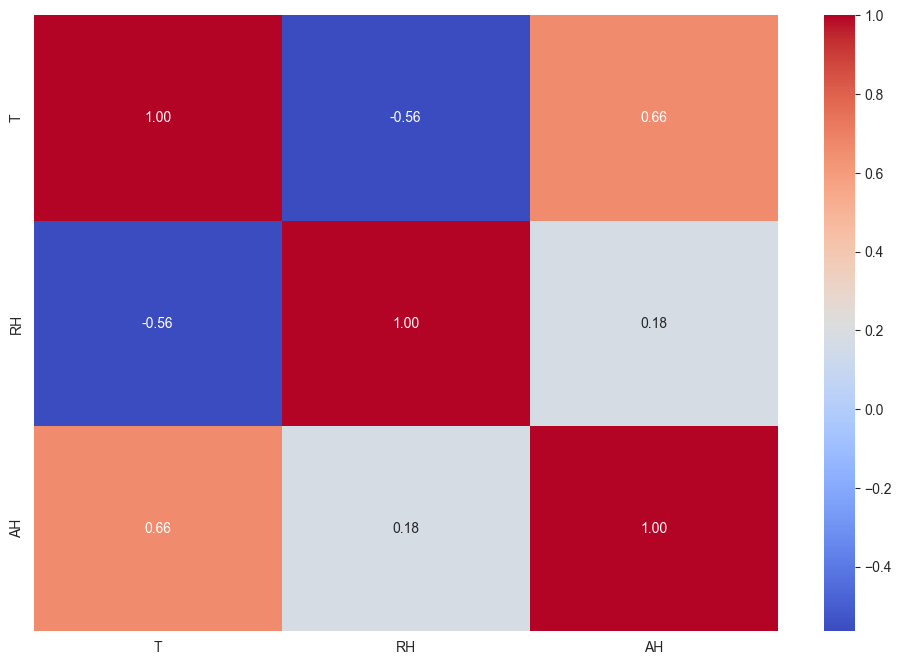

In [70]:
corrmat = df[ambiente].corr()
sns.heatmap(corrmat, annot=True, cmap="coolwarm", fmt= ".2f" )
plt.show()

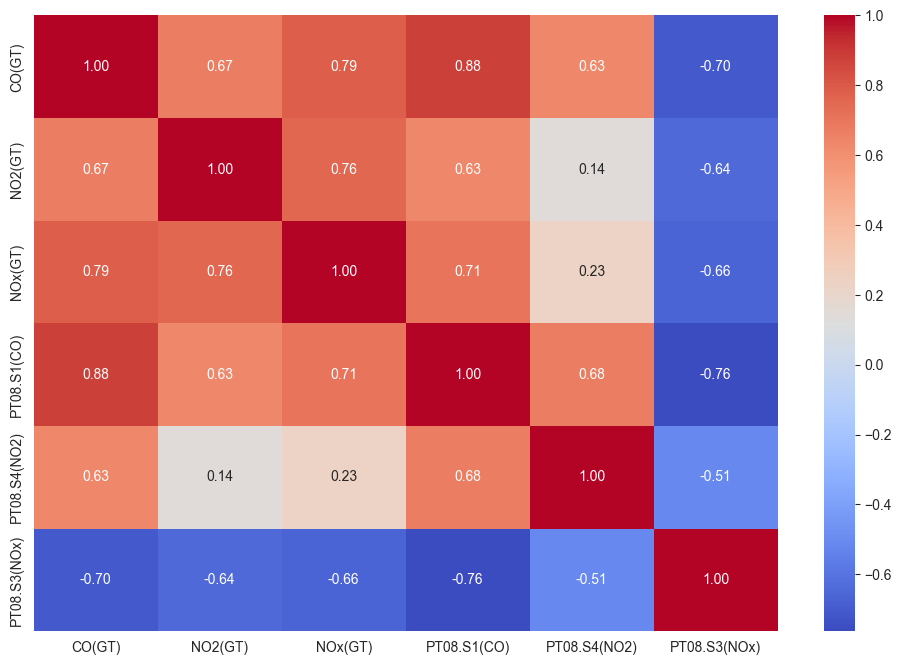

In [71]:
corrmat = df[sensores].corr()
sns.heatmap(corrmat, annot=True, cmap="coolwarm", fmt= ".2f" )
plt.show()

In [72]:
poluentes = [ 'CO(GT)', 'NO2(GT)']
sensor = 'PT08.S3(NOx)'
alvo = [ 'C6H6(GT)']

x = df[poluentes]
y = df[alvo]
print(x.isna().sum())
print(y.isna().sum())

CO(GT)     0
NO2(GT)    0
dtype: int64
C6H6(GT)    0
dtype: int64


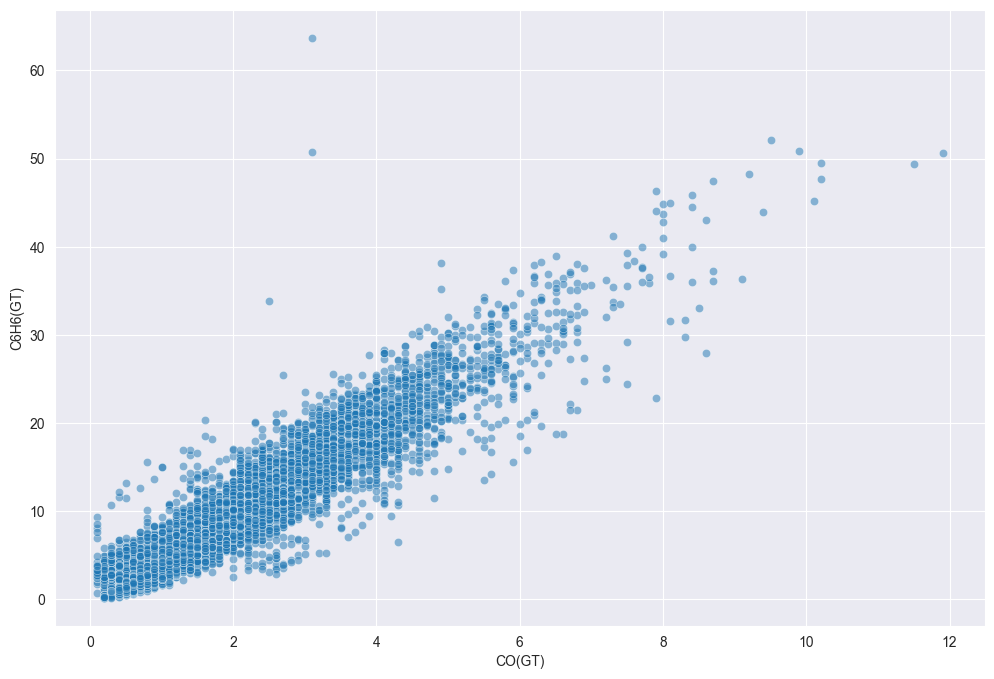

In [73]:
sns.scatterplot(x=df['CO(GT)'], y=df['C6H6(GT)'], alpha=0.5)
plt.show()

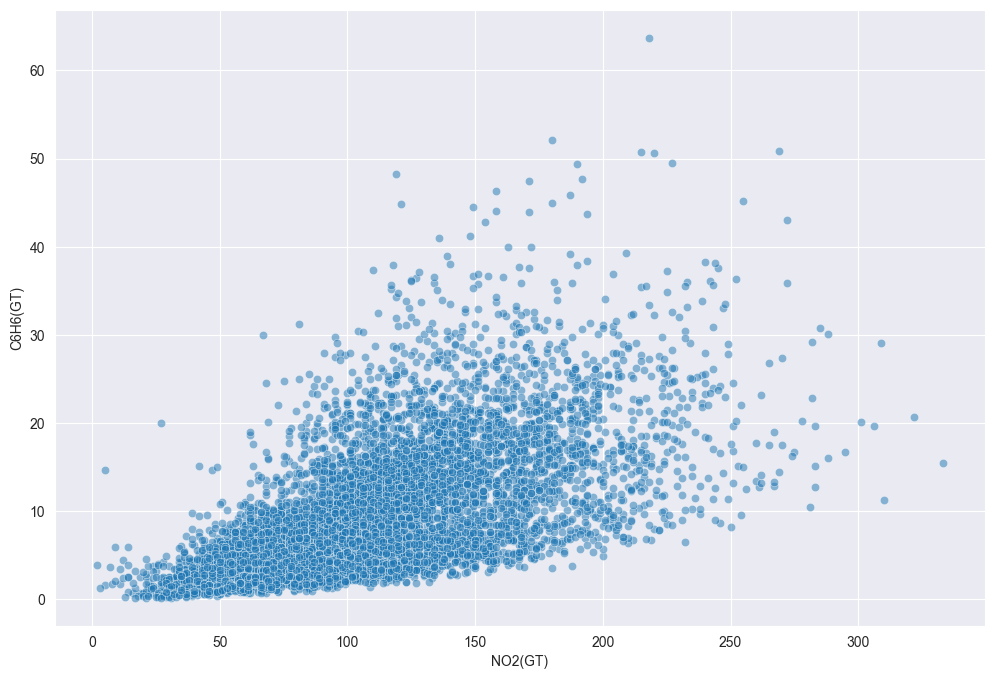

In [74]:
sns.scatterplot(x=df['NO2(GT)'], y=df['C6H6(GT)'], alpha=0.5)
plt.show()

In [75]:
x_sm = sm.add_constant(x)
print(x)
print(y)
print(x_sm)

model_sm = sm.OLS(y, x_sm).fit()
print(model_sm.summary())

      CO(GT)  NO2(GT)
0        2.6    113.0
1        2.0     92.0
2        2.2    114.0
3        2.2    122.0
4        1.6    116.0
...      ...      ...
9352     3.1    190.0
9353     2.4    179.0
9354     2.4    175.0
9355     2.1    156.0
9356     2.2    168.0

[6941 rows x 2 columns]
      C6H6(GT)
0         11.9
1          9.4
2          9.0
3          9.2
4          6.5
...        ...
9352      13.5
9353      11.4
9354      12.4
9355       9.5
9356      11.9

[6941 rows x 1 columns]
      const  CO(GT)  NO2(GT)
0       1.0     2.6    113.0
1       1.0     2.0     92.0
2       1.0     2.2    114.0
3       1.0     2.2    122.0
4       1.0     1.6    116.0
...     ...     ...      ...
9352    1.0     3.1    190.0
9353    1.0     2.4    179.0
9354    1.0     2.4    175.0
9355    1.0     2.1    156.0
9356    1.0     2.2    168.0

[6941 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:    

In [76]:
df['hora'] = df['Datetime'].dt.hour
poluentes = ['CO(GT)', 'C6H6(GT)']
mediahora = df.groupby('hora')[poluentes].mean()

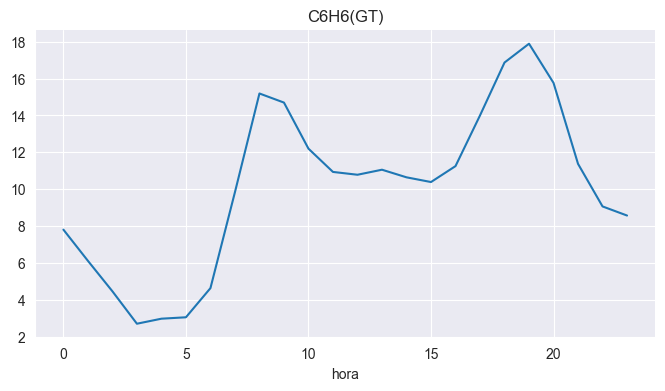

In [77]:
from matplotlib import pyplot as plt
mediahora['C6H6(GT)'].plot(kind='line', figsize=(8, 4), title='C6H6(GT)')
plt.gca().spines[['top', 'right']].set_visible(False)

# 1)
## a) Encontrar o comportamento dos poluentes no final de semana comparando com os dias de semana

## CO, C6H6, NO2, NOx, O3


In [78]:
df.copy()
df['diaSemana'] = df['Datetime'].dt.weekday


filtroFinalSemana =  (df[df['diaSemana'] > 5])
filtroFinalSemana


filtroSemana =  (df[df['diaSemana'] <= 4])
filtroSemana

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime,hora,diaSemana
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,18,2
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,19,2
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,20,2
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,21,2
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,2005-04-04 10:00:00,10,0
9353,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,2005-04-04 11:00:00,11,0
9354,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,2005-04-04 12:00:00,12,0
9355,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,2005-04-04 13:00:00,13,0


In [79]:
poluentes = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'PT08.S5(O3)']
mediaHoraFS = filtroFinalSemana.groupby('hora')[poluentes].mean()
mediaHoraS = filtroSemana.groupby('hora')[poluentes].mean()
mediaHoraFS

,CO(GT),C6H6(GT),NOx(GT),PT08.S5(O3)
hora,,,,
0,2.193478,9.271739,241.478261,1108.478261
1,1.773333,7.311111,196.822222,994.977778
2,1.295455,5.622727,137.181818,878.772727
3,1.050000,3.600000,128.000000,798.000000
4,0.981818,4.150000,103.954545,775.227273
5,0.720455,2.795455,69.500000,661.181818
6,0.675000,2.720455,70.681818,661.045455
7,0.776744,3.190698,92.069767,698.906977
8,0.920455,3.904545,122.681818,744.909091


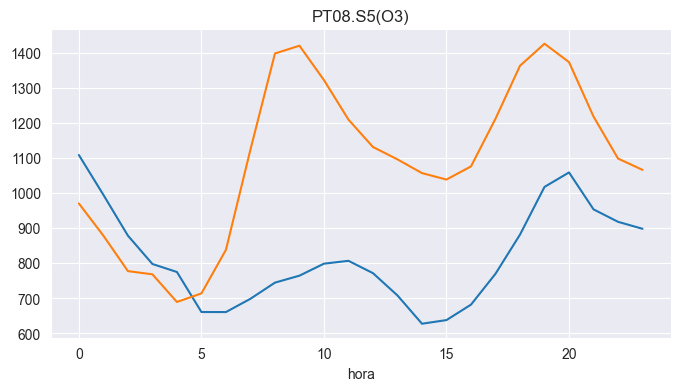

In [80]:
from matplotlib import pyplot as plt
mediaHoraFS['PT08.S5(O3)'].plot(kind='line', figsize=(8, 4), title='PT08.S5(O3)')
mediaHoraS['PT08.S5(O3)'].plot(kind='line', figsize=(8, 4), title='PT08.S5(O3)')
plt.gca().spines[['top', 'right']].set_visible(False)

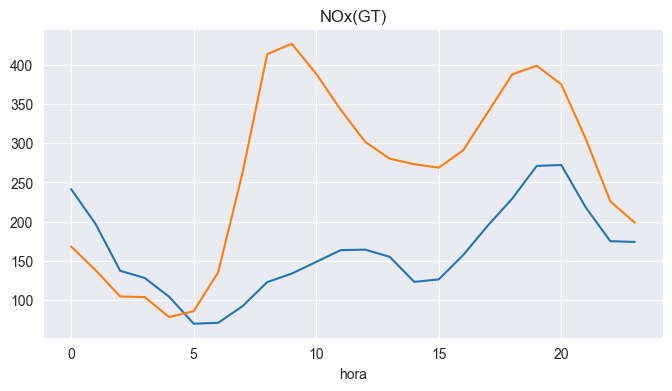

In [81]:
from matplotlib import pyplot as plt
mediaHoraFS['NOx(GT)'].plot(kind='line', figsize=(8, 4), title='NOx(GT)')
mediaHoraS['NOx(GT)'].plot(kind='line', figsize=(8, 4), title='NOx(GT)')
plt.gca().spines[['top', 'right']].set_visible(False)

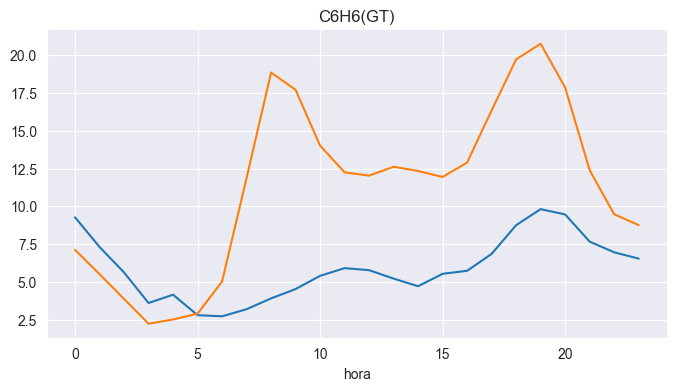

In [82]:
from matplotlib import pyplot as plt
mediaHoraFS['C6H6(GT)'].plot(kind='line', figsize=(8, 4), title='C6H6(GT)')
mediaHoraS['C6H6(GT)'].plot(kind='line', figsize=(8, 4), title='C6H6(GT)')
plt.gca().spines[['top', 'right']].set_visible(False)

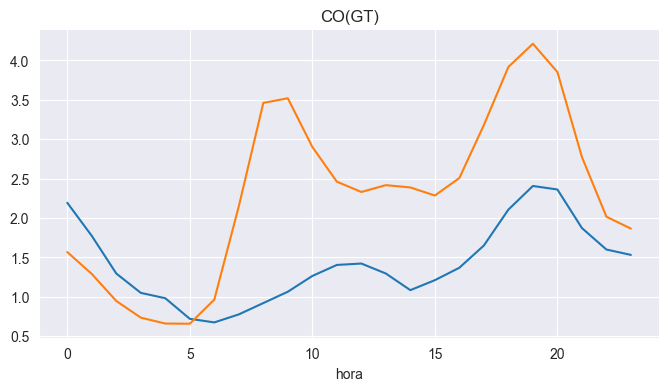

In [83]:
from matplotlib import pyplot as plt
mediaHoraFS['CO(GT)'].plot(kind='line', figsize=(8, 4), title='CO(GT)')
mediaHoraS['CO(GT)'].plot(kind='line', figsize=(8, 4), title='CO(GT)')
plt.gca().spines[['top', 'right']].set_visible(False)

# 2)
## a) Modelar a medida de O3 em relação aos demais poluentes:

## b) Avaliar se outros variáveis ambientes ajudam a explicar as concentrações de C6H6 me função do sensor de O3.

In [84]:
sensores = ['PT08.S5(O3)', 'T', 'RH', 'AH']
alvo = ['CO(GT)']

model = sm.OLS(df[alvo], df[sensores]).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 CO(GT)   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                          1.920e+04
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                        0.00
Time:                        20:46:10   Log-Likelihood:                         -7877.9
No. Observations:                6941   AIC:                                  1.576e+04
Df Residuals:                    6937   BIC:                                  1.579e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [85]:
sensores = ['PT08.S5(O3)', 'T', 'RH', 'AH']
alvo = ['NOx(GT)']

model = sm.OLS(df[alvo], df[sensores]).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                NOx(GT)   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                          1.152e+04
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                        0.00
Time:                        20:46:10   Log-Likelihood:                         -42961.
No. Observations:                6941   AIC:                                  8.593e+04
Df Residuals:                    6937   BIC:                                  8.596e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [86]:
sensores = ['PT08.S5(O3)', 'T', 'RH', 'AH']
alvo = ['NO2(GT)']

model = sm.OLS(df[alvo], df[sensores]).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                NO2(GT)   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                          2.971e+04
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                        0.00
Time:                        20:46:10   Log-Likelihood:                         -33215.
No. Observations:                6941   AIC:                                  6.644e+04
Df Residuals:                    6937   BIC:                                  6.646e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [87]:
sensores = ['PT08.S5(O3)', 'T', 'RH', 'AH']
alvo = ['C6H6(GT)']

model = sm.OLS(df[alvo], df[sensores]).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               C6H6(GT)   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                          2.154e+04
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                        0.00
Time:                        20:46:10   Log-Likelihood:                         -18601.
No. Observations:                6941   AIC:                                  3.721e+04
Df Residuals:                    6937   BIC:                                  3.724e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------